In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's start by reading the data

In [4]:
loan_data = pd.read_csv('LoanStats3a.csv', low_memory=False)

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(86), object(25)
memory usage: 36.0+ MB


Count the number of columns with only 1 or 0 values. 

In [17]:
count = 0
for column in loan_data:
    if(loan_data[column].nunique() < 2):
        count +=1
print count

6


Drop all the columns with less than 2 unique values.

In [16]:
loan_data = loan_data.dropna(thresh=2, axis=1)

In [18]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 57 columns):
id                            42538 non-null object
member_id                     42535 non-null float64
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39911 non-null object
emp_length                    42535 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
p

In [19]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'Late (16-30 days)', 'In Grace Period', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

In [23]:
loan_data['loan_status'].value_counts()

Fully Paid                                             34108
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        10
Current                                                    3
In Grace Period                                            1
Late (16-30 days)                                          1
Default                                                    1
Name: loan_status, dtype: int64

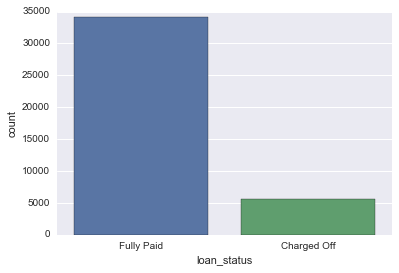

In [25]:
sns.countplot(x='loan_status', data=loan_data)

I do not have a lot of context around the loan data so I erred on the side of including more data. I selected the following columns after going through all the columns.
loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, annual_inc, verification_status, loan_status, dti, delinq_2yrs, inq_last_6mths, open_acc, revol_util, total_pymnt_inv, pub_rec_bankruptcies


In [29]:
loan_data = loan_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'verification_status', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_util', 'total_pymnt_inv', 'pub_rec_bankruptcies']]

In [30]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'Late (16-30 days)', 'In Grace Period', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

We are interested in either fully paid loans or the defaulted loans. Selecting rows with only those values.

In [24]:
loan_data = loan_data[(loan_data['loan_status'] == 'Fully Paid') | (loan_data['loan_status'] == 'Charged Off')]

Dropping all the empty rows. 

In [32]:
loan_data = loan_data.dropna()

In [33]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39023 entries, 0 to 39749
Data columns (total 16 columns):
loan_amnt               39023 non-null float64
funded_amnt             39023 non-null float64
funded_amnt_inv         39023 non-null float64
term                    39023 non-null object
int_rate                39023 non-null object
installment             39023 non-null float64
annual_inc              39023 non-null float64
verification_status     39023 non-null object
loan_status             39023 non-null object
dti                     39023 non-null float64
delinq_2yrs             39023 non-null float64
inq_last_6mths          39023 non-null float64
open_acc                39023 non-null float64
revol_util              39023 non-null object
total_pymnt_inv         39023 non-null float64
pub_rec_bankruptcies    39023 non-null float64
dtypes: float64(11), object(5)
memory usage: 5.1+ MB


In [34]:
loan_data['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [35]:
loan_data['term'] = loan_data['term'].apply(lambda x: float(x.split()[0]))

In [36]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: float(x[:-1]))

In [40]:
loan_data['revol_util'] = loan_data['revol_util'].apply(lambda x: float(x[:-1]))

In [41]:
loan_data['verification_status'].unique()


array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

verification_status and loan_status are categorical values. We'll convert them to numerical values using one hot encoding. 

In [45]:
verification_status = pd.get_dummies(loan_data['verification_status'], drop_first=True)
loan_status = pd.get_dummies(loan_data['loan_status'], drop_first=True)

In [48]:
loan_data.drop(['verification_status', 'loan_status'], axis = 1, inplace=True)

In [49]:
loan_data = pd.concat([loan_data, verification_status, loan_status], axis =1)

In [50]:
loan_data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_pymnt_inv,pub_rec_bankruptcies,Source Verified,Verified,Fully Paid
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,83.7,5833.84,0.0,0.0,1.0,1.0
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,9.4,1014.53,0.0,1.0,0.0,0.0
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,98.5,3005.67,0.0,0.0,0.0,1.0
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,21.0,12231.89,0.0,1.0,0.0,1.0
4,3000.0,3000.0,3000.0,60.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,53.9,4066.91,0.0,1.0,0.0,1.0
5,5000.0,5000.0,5000.0,36.0,7.90,156.46,36000.0,11.20,0.0,3.0,9.0,28.3,5632.21,0.0,1.0,0.0,1.0
6,7000.0,7000.0,7000.0,60.0,15.96,170.08,47004.0,23.51,0.0,1.0,7.0,85.6,10137.84,0.0,0.0,0.0,1.0
7,3000.0,3000.0,3000.0,36.0,18.64,109.43,48000.0,5.35,0.0,2.0,4.0,87.5,3939.14,0.0,1.0,0.0,1.0
8,5600.0,5600.0,5600.0,60.0,21.28,152.39,40000.0,5.55,0.0,2.0,11.0,32.6,647.50,0.0,1.0,0.0,0.0
9,5375.0,5375.0,5350.0,60.0,12.69,121.45,15000.0,18.08,0.0,0.0,2.0,36.5,1477.70,0.0,0.0,1.0,0.0


In [55]:
from sklearn.cross_validation import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(loan_data.drop('Fully Paid',axis=1), 
                                                    loan_data['Fully Paid'], test_size=0.30, 
                                                    random_state=101)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
predictions = logmodel.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.98      0.76      0.86      1570
        1.0       0.96      1.00      0.98     10137

avg / total       0.97      0.97      0.96     11707



In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dtree = DecisionTreeClassifier()

In [64]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [65]:
predictions = dtree.predict(X_test)

In [66]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.82      0.84      0.83      1570
        1.0       0.98      0.97      0.97     10137

avg / total       0.96      0.95      0.96     11707



In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier(n_estimators=600)

In [70]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
predictions = rfc.predict(X_test)

In [72]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.99      0.77      0.87      1570
        1.0       0.97      1.00      0.98     10137

avg / total       0.97      0.97      0.97     11707

